In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pycaret.regression import *

In [3]:
df = pd.read_csv(r"Travil_Clean_Dataset.csv")

In [4]:
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [5]:
df.drop(['Unnamed: 0','flight'] , axis = 1 ,inplace = True)

In [6]:
df['class'] = df['class'].apply(lambda x: 1 if x == 'Business' else 0)

In [7]:
df = df.join(pd.get_dummies(df.stops, prefix='stops').astype(int)).drop('stops', axis=1)
df = df.join(pd.get_dummies(df.airline, prefix='airline').astype(int)).drop('airline', axis=1)
df = df.join(pd.get_dummies(df.source_city, prefix='source').astype(int)).drop('source_city', axis=1)
df = df.join(pd.get_dummies(df.destination_city, prefix='dest').astype(int)).drop('destination_city', axis=1)
df = df.join(pd.get_dummies(df.arrival_time, prefix='arrival').astype(int)).drop('arrival_time', axis=1)
df = df.join(pd.get_dummies(df.departure_time, prefix='departure').astype(int)).drop('departure_time', axis=1)

In [8]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error , mean_absolute_error , r2_score

In [9]:
X = df.drop('price' , axis = 1)
y = df['price']

In [10]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size= .25 , random_state=42)

In [11]:
X_train.shape , y_train.shape

((225114, 36), (225114,))

In [12]:
RFModel = RandomForestRegressor(n_jobs=-1)

In [13]:
RFModel.fit(X_train , y_train)

RandomForestRegressor(n_jobs=-1)

In [14]:
RFModel.score(X_train,y_train)

0.9975283359804354

In [15]:
y_pred = RFModel.predict(X_test)
print('R2 :',r2_score(y_test,y_pred))
print('MAE :',mean_absolute_error(y_test,y_pred))
print('MSE :',mean_squared_error(y_test,y_pred))

R2 : 0.984743094078524
MAE : 1088.9736717556075
MSE : 7866735.539689968


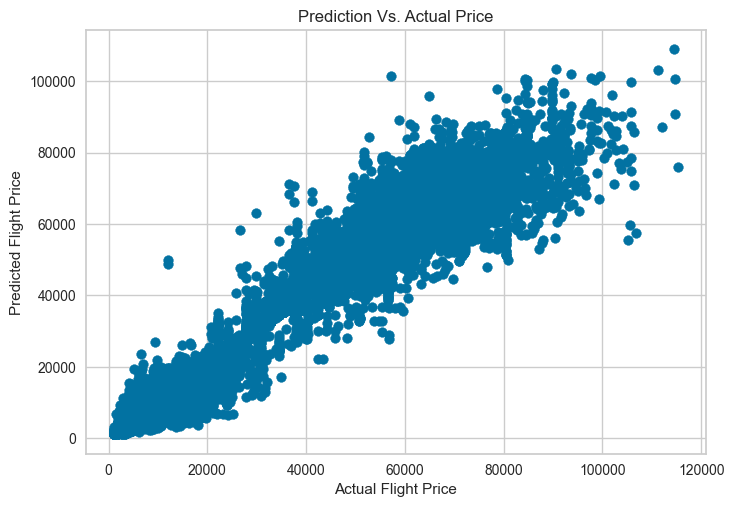

In [16]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Flight Price')
plt.ylabel('Predicted Flight Price')
plt.title('Prediction Vs. Actual Price')
plt.show()

In [17]:
exp_name = setup(X_train, target = y_train)
# modeling
best_model = compare_models()
# analyze best model
evaluate_model(best_model)

,Description,Value
0,Session id,4301
1,Target,price
2,Target type,Regression
3,Original data shape,"(225114, 37)"
4,Transformed data shape,"(225114, 37)"
5,Transformed train set shape,"(157579, 37)"
6,Transformed test set shape,"(67535, 37)"
7,Numeric features,36
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,1170.1259,8045886.5376,2836.2759,0.9844,0.1483,0.0797,14.1640
et,Extra Trees Regressor,1222.4661,9322705.9110,3053.1688,0.9819,0.1617,0.0840,18.7230
xgboost,Extreme Gradient Boosting,1978.5993,11990949.9397,3462.5015,0.9767,0.2022,0.1462,0.7770
dt,Decision Tree Regressor,1270.6361,13119605.7875,3621.5716,0.9745,0.1866,0.0848,0.2680
lightgbm,Light Gradient Boosting Machine,2318.0970,15416243.2930,3926.2371,0.9700,0.2306,0.1752,0.8670
gbr,Gradient Boosting Regressor,2947.3973,24513059.1141,4950.8109,0.9523,0.2605,0.2060,4.4040
ada,AdaBoost Regressor,3919.7808,36039011.6328,6000.6441,0.9299,0.3910,0.3666,2.8900
br,Bayesian Ridge,4578.9449,45608657.3918,6753.0782,0.9113,0.6143,0.4653,0.4660
llar,Lasso Least Angle Regression,4577.3104,45608783.2198,6753.0877,0.9113,0.6131,0.4648,0.0910
ridge,Ridge Regression,4578.9439,45608657.9102,6753.0782,0.9113,0.6143,0.4653,0.0940


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [18]:
pridect = predict_model(best_model , X_test)

In [19]:
pridect['prediction_label'][:5]

27131      7351.31
266857    70947.32
141228     6202.89
288329    60399.56
97334      6474.67
Name: prediction_label, dtype: float64

In [20]:
y_test[:5]

27131      7366
266857    64831
141228     6195
288329    60160
97334      6578
Name: price, dtype: int64

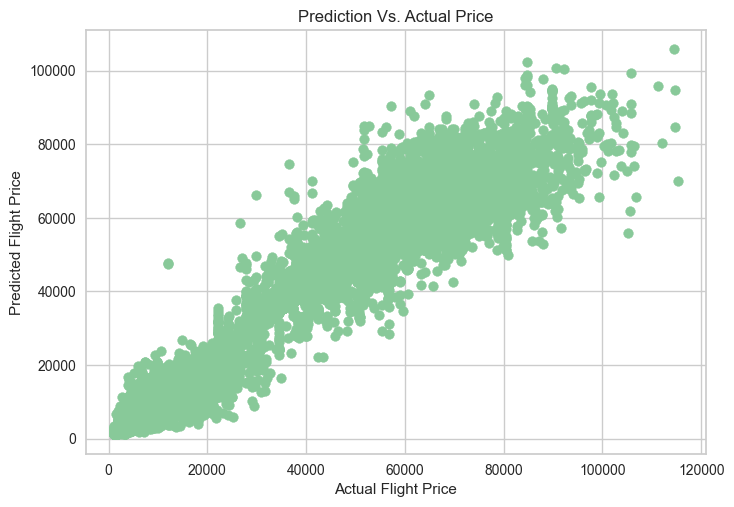

In [21]:
plt.scatter(y_test,pridect['prediction_label'] ,color = '#88c999')
plt.xlabel('Actual Flight Price')
plt.ylabel('Predicted Flight Price')
plt.title('Prediction Vs. Actual Price')
plt.show()